In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
from tqdm import tqdm

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
from matplotlib import pyplot
from keras import backend
import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
features = pd.read_csv("./Data/pamap2.csv", index_col=0)
features

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,1,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1
2943,37.81,1,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1
2954,37.92,1,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1
2965,38.03,1,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1
2976,38.14,1,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,3629.66,5,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,...,-0.002287,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8
2818413,3629.77,5,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,...,-0.007246,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8
2818423,3629.87,5,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,...,0.003818,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8
2818435,3629.99,5,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,...,-0.003649,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8


In [3]:
label = LabelEncoder()
features['activityID'] = label.fit_transform(features['activityID'])
features.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,0,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,1
2943,37.81,0,100.0,30.375,2.24615,7.48180,5.55219,2.25130,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.0,0.0,0.0,0.0,1
2954,37.92,0,100.0,30.375,2.30000,7.10681,6.09309,2.34613,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.0,0.0,0.0,0.0,1
2965,38.03,0,100.0,30.375,2.49455,7.52335,6.17157,2.59106,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.0,0.0,0.0,0.0,1
2976,38.14,0,101.0,30.375,2.71654,8.30596,4.78671,2.59596,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.0,0.0,0.0,0.0,1


In [4]:
features.columns

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id'],
      dtype=

In [5]:
h_features = features[['activityID','handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
                         'handAcc6_3','handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
                        'handMagne2', 'handMagne3']]
h_features

,activityID,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3
2932,0,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.18250,-20.0857
2943,0,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,-0.431227,0.002685,-0.062964,9.14612,-67.39360,-20.5508
2954,0,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,0.075692,-0.030792,0.005246,9.69163,-67.08980,-21.2481
2965,0,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,-0.259058,-0.267895,-0.038533,9.58694,-67.08820,-20.8997
2976,0,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,0.377115,-0.023688,-0.020670,8.59622,-67.14860,-20.1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,4,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,0.039195,0.012003,-0.026437,17.71230,-4.80473,-41.8342
2818413,4,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,0.011127,0.038150,0.059271,18.33580,-5.21004,-41.4393
2818423,4,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,0.000674,0.034051,0.008866,17.71400,-4.92892,-41.8335
2818435,4,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,-0.048145,0.034565,-0.001782,18.08540,-4.82465,-41.8349


In [6]:
c_features = features[['activityID','chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3']]
c_features

,activityID,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3
2932,0,0.352225,9.72437,-1.686650,0.173568,9.69512,-1.534140,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.92280
2943,0,0.125825,9.72560,-1.613310,0.143761,9.71023,-1.503690,-0.029411,-0.037321,-0.033805,1.113440,-50.1898,44.64950
2954,0,0.199567,9.64954,-1.689170,0.083704,9.75569,-1.533420,-0.009560,-0.055878,-0.044714,1.032800,-50.8441,43.17650
2965,0,0.279626,9.80069,-1.572050,0.114698,9.78564,-1.412620,-0.067753,0.020297,-0.012148,0.671351,-50.2744,43.29430
2976,0,0.428255,9.64882,-1.685030,0.218926,9.60427,-1.398660,0.007856,0.001881,-0.058687,2.177730,-51.2222,43.68360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,4,-2.176960,9.63375,0.397475,-2.399840,9.77329,0.703170,0.019680,0.018043,-0.013087,21.723400,-30.6849,8.91800
2818413,4,-2.145710,9.63208,0.165721,-2.266810,9.53169,0.565652,0.056830,-0.038897,0.005755,21.973900,-29.9201,8.63339
2818423,4,-1.882640,9.51751,0.054697,-2.161590,9.57682,0.504698,-0.060698,-0.026238,0.049355,21.971700,-30.6947,9.48380
2818435,4,-1.867470,9.63384,0.557966,-2.128490,9.69697,0.882662,-0.025373,0.022089,0.019818,21.863500,-30.8185,8.35572


train/test 나누고
hand 모델 만들고 hand test 후 chest test
chest 모델 만들고 chest test 후 hand test

<AxesSubplot:>

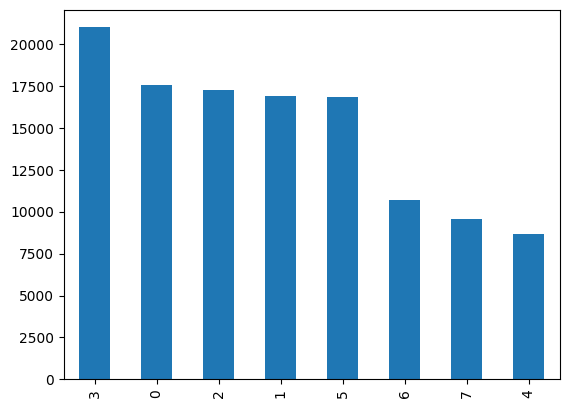

In [7]:
h_features['activityID'].value_counts().plot(kind='bar')

<AxesSubplot:>

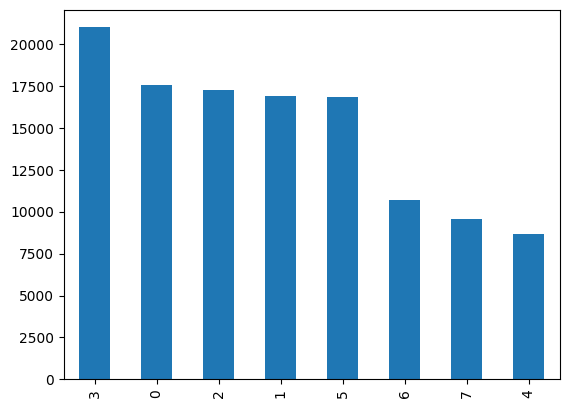

In [8]:
c_features['activityID'].value_counts().plot(kind='bar')

In [9]:
X_h = h_features.drop('activityID', axis=1)
y_h = h_features['activityID']
X_c = c_features.drop('activityID', axis=1)
y_c = c_features['activityID']
X_h.head()

,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3
2932,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857
2943,2.24615,7.48180,5.55219,2.25130,7.40595,5.65313,-0.431227,0.002685,-0.062964,9.14612,-67.3936,-20.5508
2954,2.30000,7.10681,6.09309,2.34613,7.46611,6.12103,0.075692,-0.030792,0.005246,9.69163,-67.0898,-21.2481
2965,2.49455,7.52335,6.17157,2.59106,7.76653,6.27112,-0.259058,-0.267895,-0.038533,9.58694,-67.0882,-20.8997
2976,2.71654,8.30596,4.78671,2.59596,7.94641,4.86635,0.377115,-0.023688,-0.020670,8.59622,-67.1486,-20.1947


In [10]:
X_h.columns

Index(['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3'],
      dtype='object')

In [11]:
X_c.columns

Index(['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3'],
      dtype='object')

In [12]:
scaler = StandardScaler()
X_h = scaler.fit_transform(X_h)
X_c = scaler.fit_transform(X_c)

scaled_X_h = pd.DataFrame(data = X_h, columns = ['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3'])
scaled_X_h['label'] = y_h.values

scaled_X_c = pd.DataFrame(data = X_c, columns = ['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3'])
scaled_X_c['label'] = y_h.values

scaled_X_h

,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,label
0,1.045326,0.482125,0.795339,1.020984,0.515007,0.709843,-0.050077,-0.063520,0.010673,-0.512436,-2.315690,0.079981,0
1,1.037394,0.511525,0.645671,1.027347,0.538227,0.625688,-0.332105,-0.040984,-0.027302,-0.512858,-2.324611,0.054591,0
2,1.045173,0.462137,0.795477,1.041029,0.546666,0.755891,0.063629,-0.076888,0.011046,-0.490177,-2.311773,0.016526,0
3,1.073278,0.516997,0.817213,1.076369,0.588809,0.797656,-0.197698,-0.331183,-0.013566,-0.494530,-2.311705,0.035545,0
4,1.105348,0.620071,0.433665,1.077076,0.614042,0.406751,0.298940,-0.069269,-0.003524,-0.535720,-2.314257,0.074031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118511,0.794540,-0.131965,1.677221,0.797847,-0.120649,1.679528,0.035138,-0.030990,-0.006766,-0.156707,0.320338,-1.107269,4
118512,0.795351,-0.101852,1.709010,0.774020,-0.114122,1.687951,0.013226,-0.002947,0.041419,-0.130785,0.303210,-1.085712,4
118513,0.822222,-0.107129,1.688498,0.815225,-0.118655,1.671080,0.005065,-0.007343,0.013082,-0.156637,0.315090,-1.107231,4
118514,0.789545,-0.121845,1.698325,0.780490,-0.097241,1.641642,-0.033046,-0.006792,0.007095,-0.141195,0.319496,-1.107308,4


In [13]:
scaled_X_c

,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,label
0,-0.113958,0.273971,-0.421864,-0.142715,0.267651,-0.464490,-0.025283,-0.039285,-0.058621,-0.320001,-1.109523,2.088468,0
1,-0.251278,0.274224,-0.405403,-0.161033,0.270759,-0.457645,-0.099793,-0.078221,-0.040138,-0.283493,-1.081785,2.171801,0
2,-0.206551,0.258553,-0.422430,-0.197943,0.280109,-0.464328,-0.049967,-0.108366,-0.076733,-0.288014,-1.116606,2.100712,0
3,-0.157992,0.289696,-0.396142,-0.178895,0.286269,-0.437176,-0.196031,0.015376,0.032507,-0.308281,-1.086287,2.106397,0
4,-0.067844,0.258404,-0.421501,-0.114839,0.248966,-0.434038,-0.006253,-0.014541,-0.123602,-0.223819,-1.136728,2.125185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118511,-1.647995,0.255299,0.045931,-1.724265,0.283729,0.038389,0.023426,0.011713,0.029359,0.872097,-0.043745,0.447344,4
118512,-1.629041,0.254955,-0.006088,-1.642508,0.234038,0.007479,0.116672,-0.080782,0.092563,0.886143,-0.003043,0.433608,4
118513,-1.469480,0.231349,-0.031008,-1.577842,0.243320,-0.006221,-0.178324,-0.060217,0.238816,0.886019,-0.044266,0.474650,4
118514,-1.460279,0.255318,0.081954,-1.557500,0.268032,0.078734,-0.089658,0.018285,0.139737,0.879952,-0.050855,0.420207,4


In [14]:
X_h_train, X_h_test, y_h_train, y_h_test = train_test_split(scaled_X_h, 
                                                    scaled_X_h["label"],
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [15]:
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(scaled_X_c, 
                                                    scaled_X_c["label"],
                                                    test_size = 0.25, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [16]:
TIME_STEPS = 40
STEP = 10

In [17]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)


X_h_train, y_h_train = create_dataset(X_h_train[[
    'handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3'  ]], X_h_train.label, TIME_STEPS, STEP)
X_h_test, y_h_test = create_dataset(X_h_test[[  
    'handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3']], X_h_test.label, TIME_STEPS, STEP)
X_c_train, y_c_train = create_dataset(X_c_train[[
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3']], X_c_train.label, TIME_STEPS, STEP)
X_c_test, y_c_test = create_dataset(X_c_test[[
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3']], X_c_test.label, TIME_STEPS, STEP)

print(X_h_train.shape, y_h_train.shape)

(8885, 40, 12) (8885, 1)


In [18]:
enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc_h = enc.fit(y_h_train)
enc_c = enc.fit(y_c_train)

y_h_train = enc_h.transform(y_h_train)
y_h_test = enc_h.transform(y_h_test)

y_c_train = enc_c.transform(y_c_train)
y_c_test = enc_c.transform(y_c_test)

In [19]:
print("X_h_train.shape: ", X_h_train.shape)
print("X_h_test.shape ", X_h_test.shape)
print("y_h_train.shape ", y_h_train.shape)
print("y_h_test.shape ", y_h_test.shape)

X_h_train.shape:  (8885, 40, 12)
X_h_test.shape  (2959, 40, 12)
y_h_train.shape  (8885, 8)
y_h_test.shape  (2959, 8)


In [20]:
print("X_c_train.shape: ", X_c_train.shape)
print("X_c_test.shape ", X_c_test.shape)
print("y_c_train.shape ", y_c_train.shape)
print("y_c_test.shape ", y_c_test.shape)

X_c_train.shape:  (8885, 40, 12)
X_c_test.shape  (2959, 40, 12)
y_c_train.shape  (8885, 8)
y_c_test.shape  (2959, 8)


In [21]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_h_train.shape[1],X_h_train.shape[2],y_h_train.shape[1]

In [22]:
n_timesteps, n_features, n_outputs

(40, 12, 8)

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [24]:
# #CNN MODEL

# inputs=keras.Input(shape=(n_timesteps,n_features))

# conv_1=tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=2,activation='relu')(inputs)
# maxpool_1=tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(conv_1)

# conv_2=tf.keras.layers.Conv1D(filters=96,kernel_size=3,strides=1,activation='relu')(maxpool_1)
# avg_pooling=tf.keras.layers.GlobalAveragePooling1D()(conv_2)
# batch_norm=tf.keras.layers.BatchNormalization()(avg_pooling)

# output=tf.keras.layers.Dense(n_outputs,activation='softmax')(batch_norm)
# model=tf.keras.Model(inputs=inputs,outputs=output)
# model.summary()

In [25]:
model1 = Sequential()

model1.add(LSTM(64,input_shape = [n_timesteps, n_features], return_sequences=True))

model1.add(LSTM(128))

model1.add(Dropout(0.3))

model1.add(Dense(64, activation="relu"))

model1.add(Dropout(0.5))

model1.add(Dense(n_outputs, activation = "softmax"))

In [26]:
model1.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model1.summary())
history_h = model1.fit(X_h_train, y_h_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 64)            19712     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
Total params: 127,304
Trainable params: 127,304
Non-trai

_________________________________________________________________
None
Epoch 1/100
250/250 [==============================] - 12s 35ms/step - loss: 1.6379 - accuracy: 0.3778 - val_loss: 1.5236 - val_accuracy: 0.4387
Epoch 2/100
250/250 [==============================] - 9s 35ms/step - loss: 1.5203 - accuracy: 0.4227 - val_loss: 1.4868 - val_accuracy: 0.4578
Epoch 3/100
250/250 [==============================] - 8s 33ms/step - loss: 1.4854 - accuracy: 0.4350 - val_loss: 1.4450 - val_accuracy: 0.4567
Epoch 4/100
250/250 [==============================] - 21s 85ms/step - loss: 1.4402 - accuracy: 0.4604 - val_loss: 1.4600 - val_accuracy: 0.4601
Epoch 5/100
250/250 [==============================] - 25s 101ms/step - loss: 1.4082 - accuracy: 0.4709 - val_loss: 1.4403 - val_accuracy: 0.4533
Epoch 6/100
250/250 [==============================] - 26s 103ms/step - loss: 1.3690 - accuracy: 0.4860 - val_loss: 1.4098 - val_accuracy: 0.4601
Epoch 7/100
250/250 [==============================] - 26s 

In [27]:
# model1.save('pamap2_h.h5')

93/93 [==============================] - 2s 12ms/step
[[310  63  69  80   6  25   3   1]
 [ 55 274  85  68   1  61   0   0]
 [ 51  72 193 123   1  67   7   1]
 [ 82  94 190 431   2 103  10   4]
 [  3   0   0   2   0   0   0   0]
 [ 34  58  64 105   2 101   6   0]
 [  5   4   7   6   0   1   0   0]
 [  4   5   8   5   0   7   0   0]]
0.4423791821561338
              precision    recall  f1-score   support

           0       0.57      0.56      0.56       557
           1       0.48      0.50      0.49       544
           2       0.31      0.37      0.34       515
           3       0.53      0.47      0.50       916
           4       0.00      0.00      0.00         5
           5       0.28      0.27      0.27       370
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00        29

    accuracy                           0.44      2959
   macro avg       0.27      0.27      0.27      2959
weighted avg       0.45      0.44      0.44      2

<AxesSubplot:>

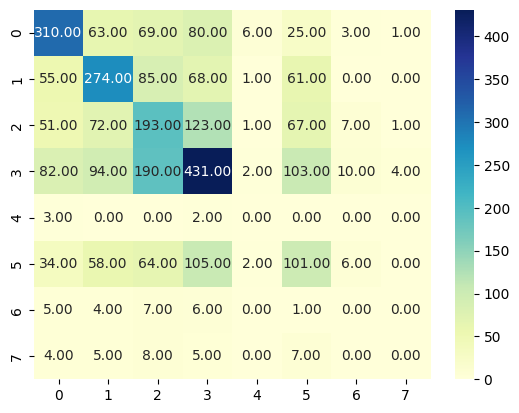

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

y_h_pred=model1.predict(X_h_test)
y_h_pred = np.argmax(y_h_pred, axis=-1)
y_h_test2 = np.argmax(y_h_test, axis=-1)

cm=confusion_matrix(y_h_test2,y_h_pred)

print(cm)
print(accuracy_score(y_h_test2,y_h_pred))
print(classification_report(y_h_test2,y_h_pred))

# Confusion matrix를 일반 배열(리스트의 리스트)로 변환
cm_list = cm.tolist()

sns.heatmap(cm_list, cmap="YlGnBu", annot=True, fmt = '.2f')

In [29]:
# #CNN MODEL

# inputs=keras.Input(shape=(n_timesteps,n_features))

# conv_1=tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=2,activation='relu')(inputs)
# maxpool_1=tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(conv_1)

# conv_2=tf.keras.layers.Conv1D(filters=96,kernel_size=3,strides=1,activation='relu')(maxpool_1)
# avg_pooling=tf.keras.layers.GlobalAveragePooling1D()(conv_2)
# batch_norm=tf.keras.layers.BatchNormalization()(avg_pooling)

# output=tf.keras.layers.Dense(n_outputs,activation='softmax')(batch_norm)
# model=tf.keras.Model(inputs=inputs,outputs=output)
# model.summary()

In [30]:
model2 = Sequential()

model2.add(LSTM(64,input_shape = [n_timesteps, n_features], return_sequences=True))

model2.add(LSTM(128))

model2.add(Dropout(0.3))

model2.add(Dense(64, activation="relu"))

model2.add(Dropout(0.5))

model2.add(Dense(n_outputs, activation = "softmax"))

In [31]:
model2.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_c = model2.fit(X_c_train, y_c_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model2.summary())

Epoch 1/100
250/250 [==============================] - 13s 43ms/step - loss: 1.6097 - accuracy: 0.3927 - val_loss: 1.4996 - val_accuracy: 0.4421
Epoch 2/100
250/250 [==============================] - 10s 39ms/step - loss: 1.5016 - accuracy: 0.4266 - val_loss: 1.4423 - val_accuracy: 0.4488
Epoch 3/100
250/250 [==============================] - 10s 40ms/step - loss: 1.4506 - accuracy: 0.4393 - val_loss: 1.4221 - val_accuracy: 0.4657
Epoch 4/100
250/250 [==============================] - 10s 39ms/step - loss: 1.4239 - accuracy: 0.4502 - val_loss: 1.3872 - val_accuracy: 0.4623
Epoch 5/100
250/250 [==============================] - 10s 39ms/step - loss: 1.4022 - accuracy: 0.4587 - val_loss: 1.3830 - val_accuracy: 0.4657
Epoch 6/100
250/250 [==============================] - 10s 42ms/step - loss: 1.3862 - accuracy: 0.4667 - val_loss: 1.4056 - val_accuracy: 0.4432
Epoch 7/100
250/250 [==============================] - 10s 41ms/step - loss: 1.3721 - accuracy: 0.4724 - val_loss: 1.3625 - val_ac

In [32]:
# model2.save('pamap2_c.h5')

93/93 [==============================] - 3s 16ms/step
[[360  32  51  75   1  33   3   2]
 [ 58 169 138 129   0  44   1   5]
 [ 33  89 194 135   0  60   3   1]
 [ 86 105 214 364   1 138   4   4]
 [  0   0   0   4   0   1   0   0]
 [ 24  31  72 182   0  54   7   0]
 [  6   2   5   4   0   4   1   1]
 [  3   2  11   9   0   2   1   1]]
0.38627914836093274
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       557
           1       0.39      0.31      0.35       544
           2       0.28      0.38      0.32       515
           3       0.40      0.40      0.40       916
           4       0.00      0.00      0.00         5
           5       0.16      0.15      0.15       370
           6       0.05      0.04      0.05        23
           7       0.07      0.03      0.05        29

    accuracy                           0.39      2959
   macro avg       0.25      0.24      0.24      2959
weighted avg       0.39      0.39      0.38      

<AxesSubplot:>

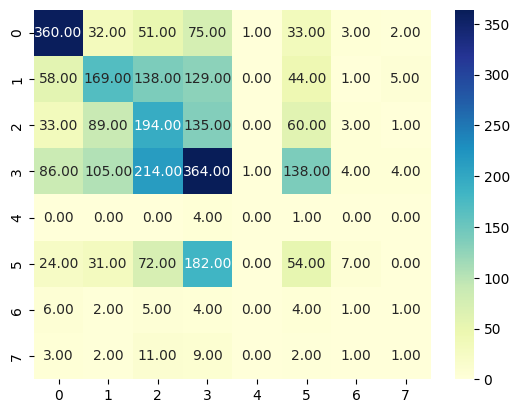

In [33]:
y_c_pred=model2.predict(X_c_test)
y_c_pred = np.argmax(y_c_pred, axis=-1)
y_c_test2 = np.argmax(y_c_test, axis=-1)

cm=confusion_matrix(y_c_test2,y_c_pred)

print(cm)
print(accuracy_score(y_c_test2,y_c_pred))
print(classification_report(y_c_test2,y_c_pred))

# Confusion matrix를 일반 배열(리스트의 리스트)로 변환
cm_list = cm.tolist()

sns.heatmap(cm_list, cmap="YlGnBu", annot=True, fmt = '.2f')

In [34]:
# from keras.models import load_model
# model_h = load_model('pamap2_h.h5')
# model_c = load_model('pamap2_c.h5')

In [35]:
# 모델 평가
# loss_h, accuracy_h = model_h.evaluate(X_c_test, y_c_test, verbose=1)
loss_h, accuracy_h = model1.evaluate(X_c_test, y_c_test, verbose=1)

print(f'평가 손실: {loss_h:.4f}')
print(f'평가 정확도: {accuracy_h:.4f}')

93/93 [==============================] - 1s 15ms/step - loss: 11.1531 - accuracy: 0.1365
평가 손실: 11.1531
평가 정확도: 0.1365


In [36]:
# 모델 평가
# loss_c, accuracy_c = model_c.evaluate(X_h_test, y_h_test, verbose=1)
loss_c, accuracy_c = model2.evaluate(X_h_test, y_h_test, verbose=1)

print(f'평가 손실: {loss_c:.4f}')
print(f'평가 정확도: {accuracy_c:.4f}')

93/93 [==============================] - 2s 18ms/step - loss: 11.9742 - accuracy: 0.1879
평가 손실: 11.9742
평가 정확도: 0.1879


In [269]:
# Base 모델을 로드

base_model_h = keras.models.load_model('pamap2_h.h5')
new_model_h = keras.models.Sequential(base_model_h.layers[:-1])
base_model_h.trainable = False
new_model_h.add(keras.layers.Flatten())
new_model_h.add(keras.layers.Dense(8, activation="relu"))
new_model_h.add(keras.layers.Dense(8, activation="sigmoid"))
# 몇번의 에포크 동안 훈련을 하고 나면 동결을 해제하고 
# 새로운 작업 B에 맞게 이 재사용된 층들을 세밀하게 튜닝
# 이때 학습률을 낮춰 가중치가 망가지는 것을 막아야함

new_model_h.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-5),
                     metrics=["accuracy"])

history2_h = new_model_h.fit(X_c_train, y_c_train, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model_h.summary()

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 2.0198 - accuracy: 0.2620 - val_loss: 1.7873 - val_accuracy: 0.3420
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 1.7233 - accuracy: 0.3390 - val_loss: 1.6731 - val_accuracy: 0.3386
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 1.6401 - accuracy: 0.3593 - val_loss: 1.6299 - val_accuracy: 0.3577
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 1.6009 - accuracy: 0.3716 - val_loss: 1.6011 - val_accuracy: 0.3656
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 1.5762 - accuracy: 0.3766 - val_loss: 1.5907 - val_accuracy: 0.3813
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 1.5601 - accuracy: 0.3859 - val_loss: 1.5769 - val_accuracy: 0.3791
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 1.5481 - accuracy: 0.3892 - val_loss: 1.5736 - val_accuracy: 0.3858
Epoch 

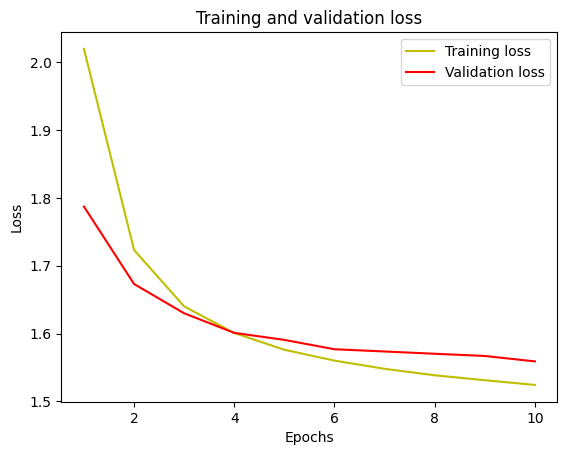

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history2_h.history['loss']
val_loss = history2_h.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

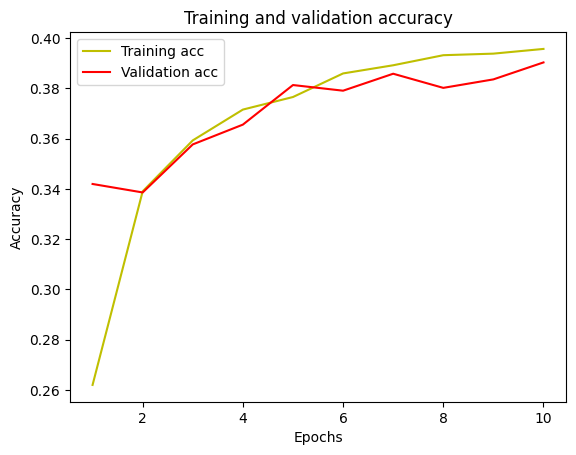

In [271]:
acc = history2_h.history['accuracy']
val_acc = history2_h.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [272]:
new_model_h.evaluate(X_c_test, y_c_test)
y_pred = new_model_h.predict(X_c_test)

 1/93 [..............................] - ETA: 1s - loss: 1.5048 - accuracy: 0.3125

93/93 [==============================] - 0s 1ms/step


In [273]:
y_test_arg=np.argmax(y_c_test,axis=1)
Y_pred = np.argmax(new_model_h.predict(X_c_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

93/93 [==============================] - 0s 1ms/step
Confusion Matrix
[[396   0   9 151   0   1   0   0]
 [136  14  39 354   0   1   0   0]
 [100  17  36 362   0   0   0   0]
 [196  13  40 663   0   4   0   0]
 [  2   0   0   3   0   0   0   0]
 [ 78   8  13 267   0   4   0   0]
 [  3   1   4  15   0   0   0   0]
 [  4   0   1  23   0   1   0   0]]


In [264]:
# Base 모델을 로드

base_model_c = keras.models.load_model('pamap2_c.h5')
new_model_c = keras.models.Sequential(base_model_c.layers[:-1])
base_model_c.trainable = False
new_model_c.add(keras.layers.Flatten())
new_model_c.add(keras.layers.Dense(8, activation="sigmoid"))
# 몇번의 에포크 동안 훈련을 하고 나면 동결을 해제하고 
# 새로운 작업 B에 맞게 이 재사용된 층들을 세밀하게 튜닝
# 이때 학습률을 낮춰 가중치가 망가지는 것을 막아야함

new_model_c.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-5),
                     metrics=["accuracy"])

history2_c = new_model_c.fit(X_h_train, y_h_train, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model_c.summary()

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 2.4132 - accuracy: 0.2457 - val_loss: 2.1031 - val_accuracy: 0.2430
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 1.7868 - accuracy: 0.3214 - val_loss: 1.8461 - val_accuracy: 0.3273
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 1.6578 - accuracy: 0.3563 - val_loss: 1.7545 - val_accuracy: 0.3431
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 1.6156 - accuracy: 0.3669 - val_loss: 1.7293 - val_accuracy: 0.3420
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 1.5957 - accuracy: 0.3764 - val_loss: 1.7218 - val_accuracy: 0.3375
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 1.5859 - accuracy: 0.3791 - val_loss: 1.7087 - val_accuracy: 0.3566
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 1.5795 - accuracy: 0.3804 - val_loss: 1.6989 - val_accuracy: 0.3442
Epoch 

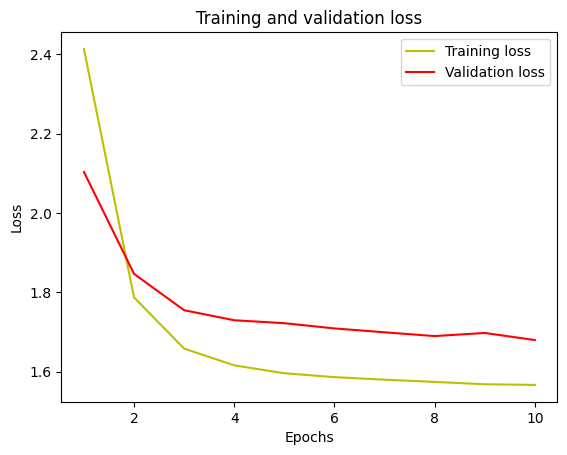

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history2_c.history['loss']
val_loss = history2_c.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

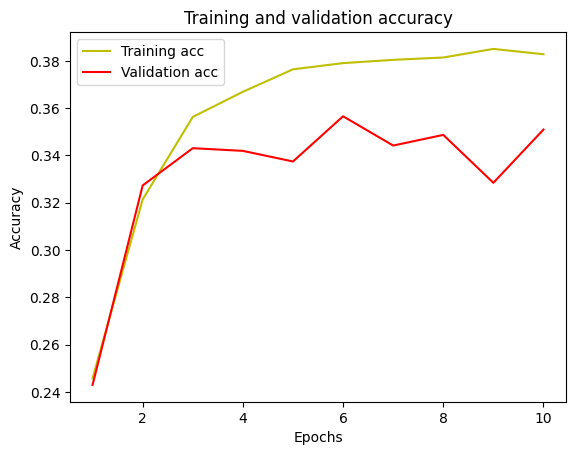

In [266]:
acc = history2_c.history['accuracy']
val_acc = history2_c.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [267]:
new_model_c.evaluate(X_h_test, y_h_test)
y_pred = new_model_c.predict(X_h_test)

93/93 [==============================] - 0s 2ms/step


In [268]:
y_test_arg=np.argmax(y_h_test,axis=1)
Y_pred = np.argmax(new_model_c.predict(X_h_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

93/93 [==============================] - 0s 1ms/step
Confusion Matrix
[[348  19  15 157   1  14   1   2]
 [230  46  31 206   1  28   0   2]
 [157  38  61 232   2  23   1   1]
 [237  42  61 532   6  37   0   1]
 [  2   1   1   1   0   0   0   0]
 [116  20  29 177   1  26   1   0]
 [  9   2   1  11   0   0   0   0]
 [ 12   0   3  14   0   0   0   0]]
